<a href="https://colab.research.google.com/github/khuramgill/Gen-Ai/blob/main/Part1%2C_Part2%2C_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task1**

In [ ]:
import pandas as pd
df = pd.read_csv('canada_campsites.csv')
df.head()

,longitude,latitude,code,name,type,phone,dates_open,comments,num_sites,elevation,amenities,state,nearest_town_distance,nearest_town_bearing,city
0,-114.353,53.675,ALBE,Alberta Beach Family RV Park,CP,780.924.2333,mid may-late sep,NaN,30.0,NaN,WES,AB,NaN,NaN,Alberta Beach
1,-112.332,53.880,ANDR,Andrew RV Park,CP,780.365.3687,mid may-late aug,no tents,15.0,NaN,WES,AB,NaN,NaN,Andrew
2,-113.962,52.034,ANTH,Anthony Henday,CP,403.318.3508,mid may-mid oct,pull thrus,45.0,NaN,E DP SH RS,AB,NaN,NaN,Innisfail
3,-110.590,52.750,ARML,Arm Lake Rec Area,CP,780.842.4727,mid may-mid oct,big rigs OK,100.0,NaN,WE,AB,NaN,NaN,Wainwright
4,-117.164,58.490,ASPE,Aspen Ridge,CP,780.926.4540,NaN,NaN,40.0,NaN,WES,AB,NaN,NaN,High Level


# **Task2**

 **Install and Import Necessary Libraries**

In [ ]:
# Import necessary libraries
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Download required NLTK datasets
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


**Load a Text Corpus**

In [ ]:
alice_text = gutenberg.raw('carroll-alice.txt')
print(alice_text[:500])  # Print the first 500 characters

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [3]:
pip install pymupdf

# **Extract Text From Pdf**

In [4]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    # Open the PDF file
    document = fitz.open(pdf_path)
    text = ""

    # Iterate through each page
    for page_num in range(len(document)):
        page = document.load_page(page_num)  # Load page
        text += page.get_text()  # Extract text from page

    return text

if __name__ == "__main__":
    pdf_path = 'test.pdf'  # Use a raw string to avoid escape sequence issues
    extracted_text = extract_text_from_pdf(pdf_path)
    print(extracted_text)


 
 
PDF Test File 
 
Congratulations, your computer is equipped with a PDF (Portable Document Format) 
reader!  You should be able to view any of the PDF documents and forms available on 
our site.  PDF forms are indicated by these icons: 
  or  
.   
 
Yukon Department of Education 
Box 2703 
Whitehorse,Yukon 
Canada 
Y1A 2C6 
 
Please visit our website at:  http://www.education.gov.yk.ca/
   



 **Tokenization**: Split the text into words and sentences.

In [6]:
sentences = sent_tokenize(extracted_text)
words = word_tokenize(extracted_text)
print(f"First 5 sentences: {sentences[:5]}")
print(f"First 20 words: {words[:200]}")

First 5 sentences: [' \n \nPDF Test File \n \nCongratulations, your computer is equipped with a PDF (Portable Document Format) \nreader!', 'You should be able to view any of the PDF documents and forms available on \nour site.', 'PDF forms are indicated by these icons: \n  or  \n.', 'Yukon Department of Education \nBox 2703 \nWhitehorse,Yukon \nCanada \nY1A 2C6 \n \nPlease visit our website at:  http://www.education.gov.yk.ca/']
First 20 words: ['PDF', 'Test', 'File', 'Congratulations', ',', 'your', 'computer', 'is', 'equipped', 'with', 'a', 'PDF', '(', 'Portable', 'Document', 'Format', ')', 'reader', '!', 'You', 'should', 'be', 'able', 'to', 'view', 'any', 'of', 'the', 'PDF', 'documents', 'and', 'forms', 'available', 'on', 'our', 'site', '.', 'PDF', 'forms', 'are', 'indicated', 'by', 'these', 'icons', ':', 'or', '.', 'Yukon', 'Department', 'of', 'Education', 'Box', '2703', 'Whitehorse', ',', 'Yukon', 'Canada', 'Y1A', '2C6', 'Please', 'visit', 'our', 'website', 'at', ':', 'http', ':', 

**Stemming**: Reduce words to their root form

In [ ]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]
print(f"First 20 stemmed words: {stemmed_words[:20]}")

First 20 stemmed words: ['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


**Lemmatization**: Further reduce the stemmed words by considering their context.

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
print(f"First 20 lemmatized words: {lemmatized_words[:20]}")

First 20 lemmatized words: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


**Stop Word Removal**: Eliminate common words that may not be useful for analysis.

In [ ]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print(f"First 20 words after stop word removal: {filtered_words[:20]}")

First 20 words after stop word removal: ['[', 'Alice', "'s", 'Adventures', 'Wonderland', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', '.', 'Rabbit-Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', ',']


# **Task3**

Convert the filtered words back to text

In [ ]:
processed_text = ' '.join(filtered_words)

Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform([processed_text])
bow_feature_names = vectorizer.get_feature_names_out()
bow_counts = bow_matrix.toarray().sum(axis=0)
bow_freq = dict(zip(bow_feature_names, bow_counts))
# print(bow_freq)

{'1865': 1, '_i_': 2, 'abide': 1, 'able': 1, 'absence': 1, 'absurd': 2, 'acceptance': 1, 'accident': 2, 'accidentally': 1, 'account': 1, 'accounting': 1, 'accounts': 1, 'accusation': 1, 'accustomed': 1, 'ache': 1, 'across': 5, 'act': 1, 'actually': 1, 'ada': 1, 'added': 23, 'adding': 1, 'addressed': 2, 'addressing': 1, 'adjourn': 1, 'adoption': 1, 'advance': 3, 'advantage': 3, 'adventures': 7, 'advice': 2, 'advisable': 2, 'advise': 1, 'affair': 1, 'affectionately': 1, 'afford': 1, 'afore': 1, 'afraid': 12, 'after': 3, 'afterwards': 2, 'age': 4, 'ago': 2, 'agony': 1, 'agree': 2, 'ah': 5, 'ahem': 1, 'air': 15, 'airs': 1, 'alarm': 2, 'alarmed': 1, 'alas': 4, 'alice': 398, 'alive': 3, 'all': 4, 'allow': 3, 'almost': 6, 'alone': 4, 'along': 6, 'aloud': 5, 'already': 2, 'also': 2, 'altered': 1, 'alternately': 1, 'altogether': 5, 'always': 13, 'am': 1, 'ambition': 1, 'among': 12, 'an': 1, 'ancient': 1, 'and': 62, 'anger': 2, 'angrily': 9, 'angry': 5, 'animal': 2, 'animals': 4, 'ann': 4, 'anno

TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([processed_text])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().flatten()
tfidf_freq = dict(zip(tfidf_feature_names, tfidf_scores))

N-grams


In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vectorizer.fit_transform([processed_text])
bigram_feature_names = bigram_vectorizer.get_feature_names_out()
bigram_counts = bigram_matrix.toarray().sum(axis=0)
bigram_freq = dict(zip(bigram_feature_names, bigram_counts))

Function to visualize word cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def visualize_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

Visualize the most common terms with each method using word cloud

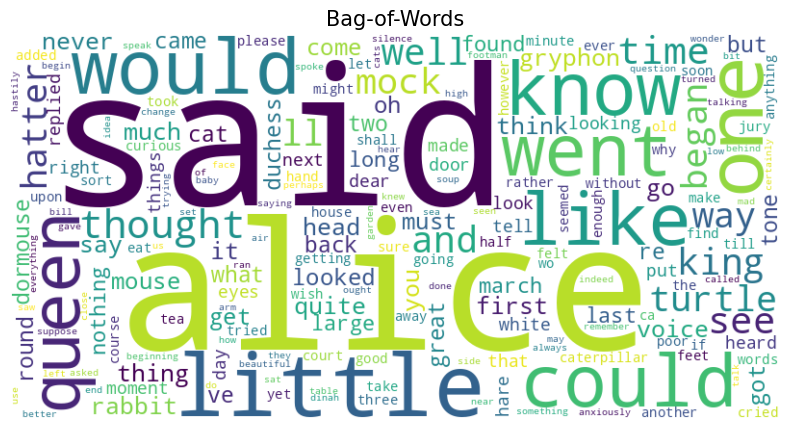

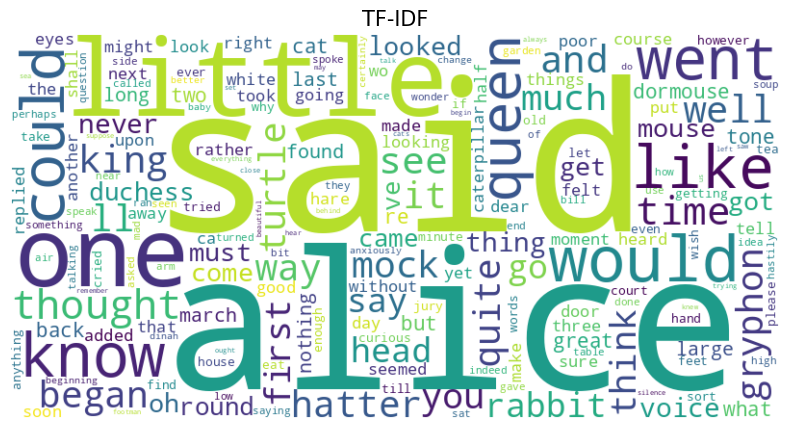

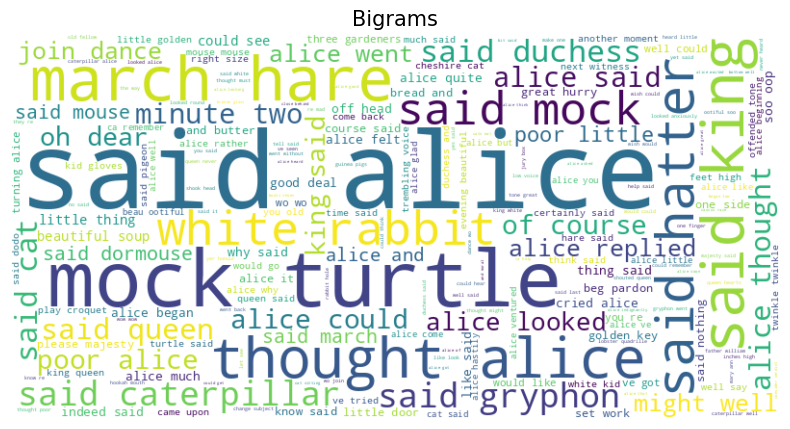

In [ ]:
visualize_wordcloud(bow_freq, 'Bag-of-Words')
visualize_wordcloud(tfidf_freq, 'TF-IDF')
visualize_wordcloud(bigram_freq, 'Bigrams')